In [1]:
import numpy as np
import matplotlib.pyplot as pl
import matplotlib as mpl
import pandas as pd
import sys
sys.path.append("../")
import gyrochrones as gyr
from sklearn import mixture

pl.rc('xtick', labelsize=20)
pl.rc('ytick', labelsize=20)
pl.rc('axes', labelsize=25)
pl.rc('axes', titlesize=30)
pl.rc('legend', handlelength=1)
pl.rc('legend', fontsize=20)

%matplotlib inline

In [2]:
df = pd.read_hdf('../../output/good.h5')

In [3]:
gmm = mixture.GaussianMixture(n_components=2)

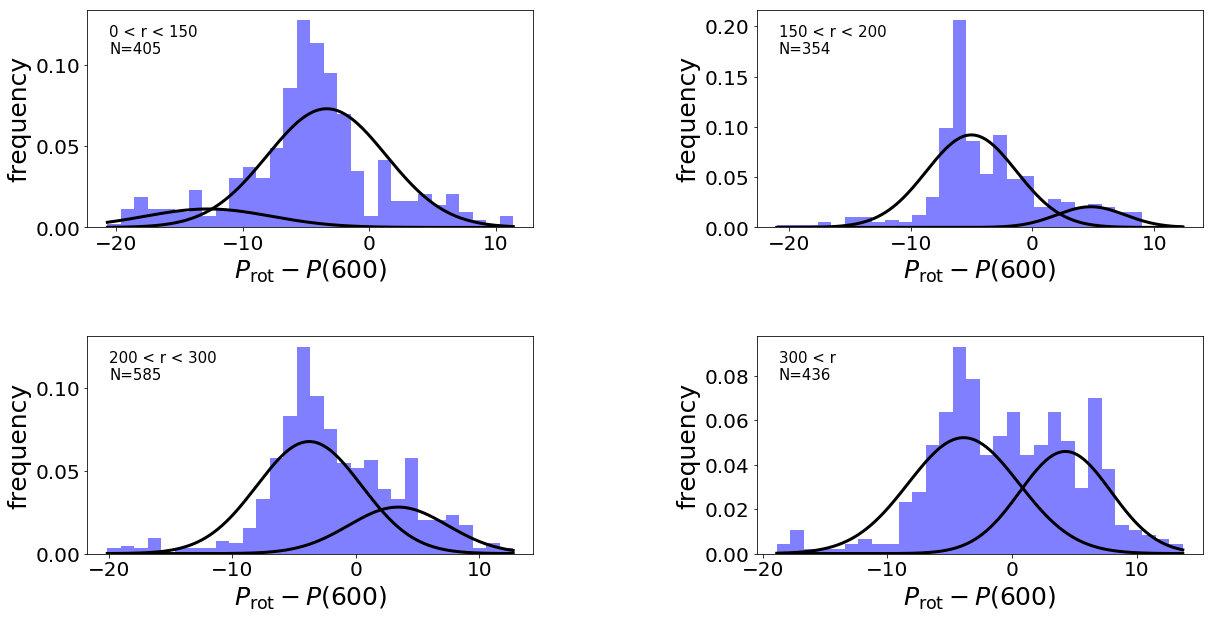

In [4]:
dist = np.array([0, 150, 200, 300, 1000000])
gyr_age = 600
gyrochrone = gyr.MM09e3(df['B_V'], gyr_age)
finite_age_mask = np.isfinite(gyrochrone)
color_mask = (df['B_V'] > 1.1) & (df['B_V'] < 1.5)
fig, axs = pl.subplots(2, 2, figsize=(20, 10))
axs = np.concatenate(axs)
pl.subplots_adjust(wspace=0.5, hspace=0.5)
#xs = np.concatenate(axs)
for i in range(1, len(dist)):
    cut = (df['r_est'] > dist[i-1]) & (df['r_est'] < dist[i])
    mask = finite_age_mask & cut & color_mask
    perdiff = np.exp(df['logperiod_mean'][mask]) - gyrochrone[mask]
    res = gmm.fit(np.array(perdiff).reshape(-1, 1))
    x = np.linspace(np.min(perdiff), np.max(perdiff), 1000)
    prediction = np.exp(res.score_samples(x.reshape(-1, 1)))
    resp = gmm.predict_proba(x.reshape(-1, 1))
    ind_pred = resp * prediction[:, np.newaxis]
    if i == len(dist)-1:
        axs[i-1].annotate("{0} < r \nN={1}".format(dist[i-1], np.sum(mask)), 
                    xy=(0.05, 0.8), xycoords='axes fraction', fontsize=15)
    else:
        axs[i-1].annotate("{0} < r < {1}\nN={2}".format(dist[i-1], dist[i], np.sum(mask)), 
                    xy=(0.05, 0.8), xycoords='axes fraction', fontsize=15)
    axs[i-1].plot(x, ind_pred, linewidth=3, color='k')
    axs[i-1].hist(perdiff, color='b', density=True, bins=30, alpha=0.5)
    axs[i-1].set_xlabel(r'$P_\mathrm{{rot}} - P({0})$'.format(gyr_age))
    axs[i-1].set_ylabel('frequency')
pl.savefig("distance_gmm.pdf")

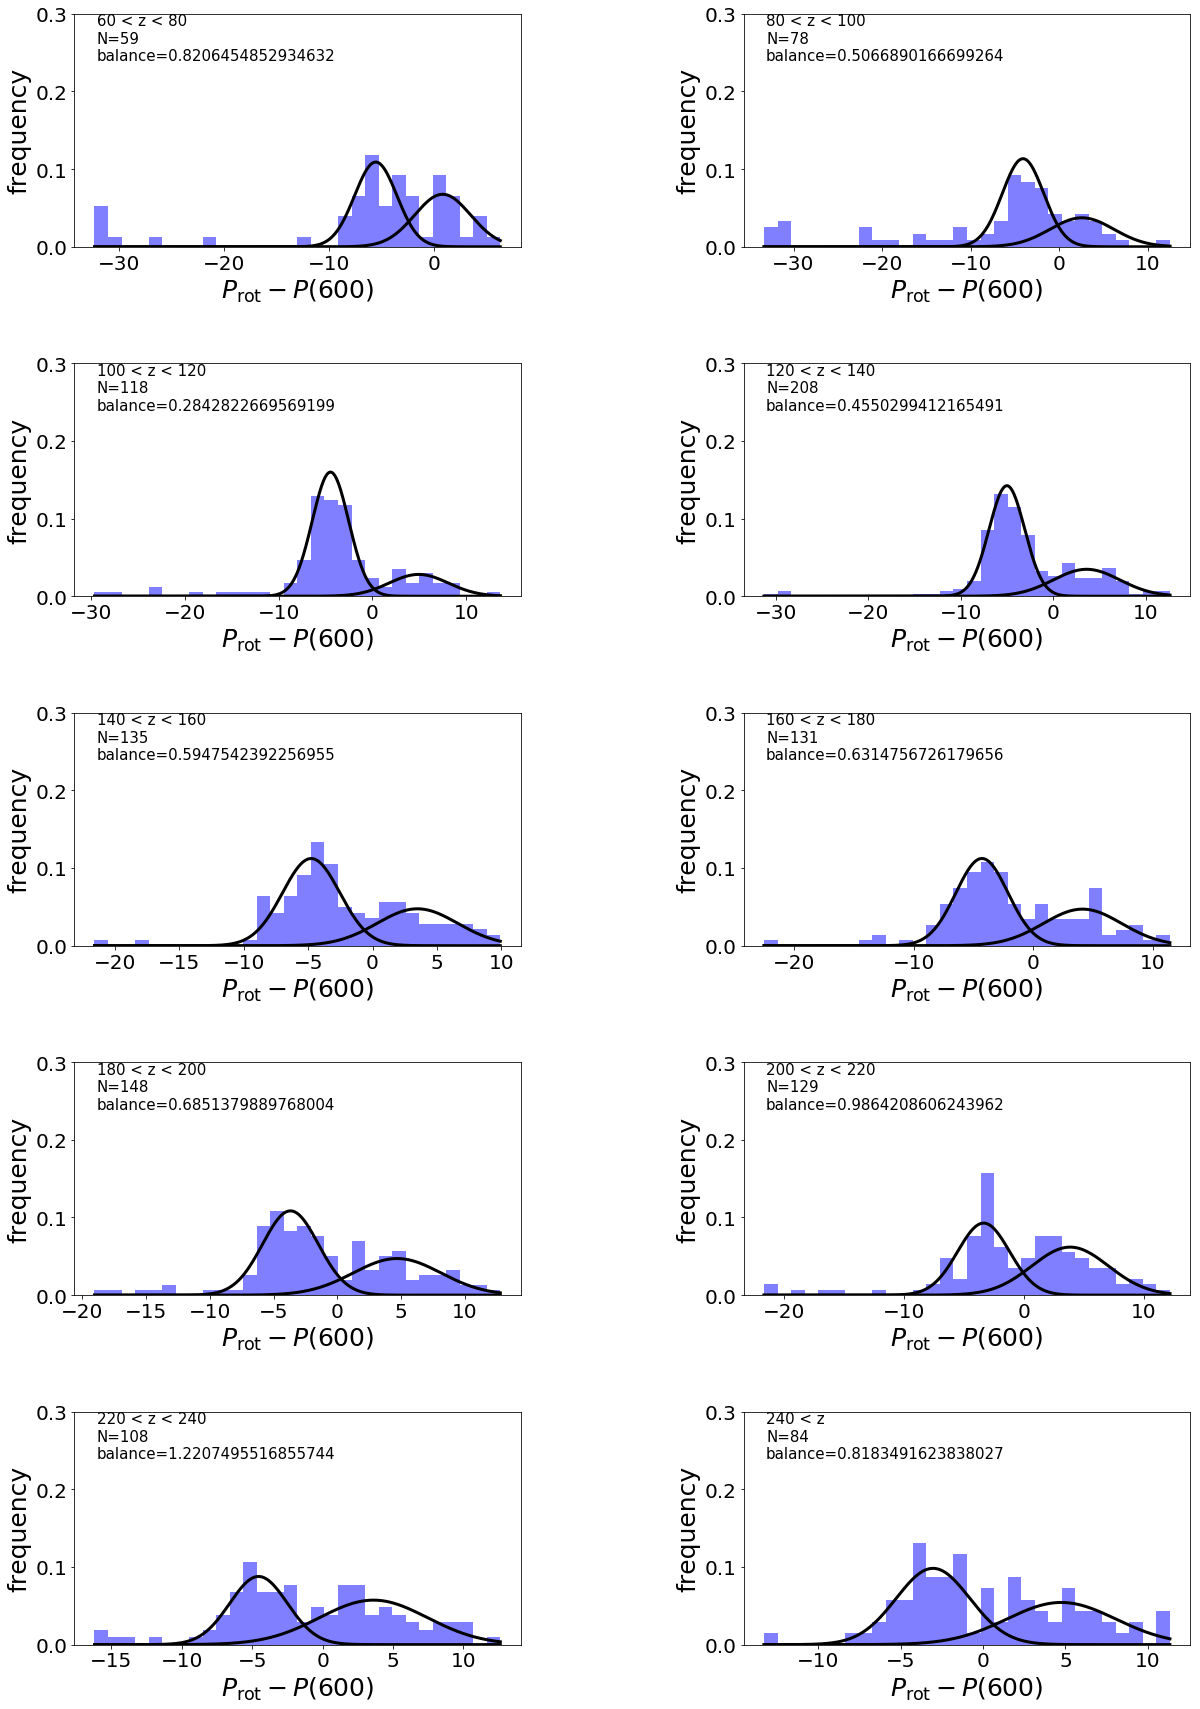

In [46]:
height = np.array([60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260])
gyr_age = 600
gyrochrone = gyr.Gordon2019(df['B_V'])
finite_age_mask = np.isfinite(gyrochrone)
color_mask = (df['B_V'] > 1.0) & (df['B_V'] < 3.0)
fig, axs = pl.subplots(5, 2, figsize=(20, 30))
axs = np.concatenate(axs)
pl.subplots_adjust(wspace=0.5, hspace=0.5)
#xs = np.concatenate(axs)
for i in range(1, len(height)):
    cut = (df['galcen_z'] > height[i-1]) & (df['galcen_z'] < height[i])
    mask = finite_age_mask & cut & color_mask
    perdiff = np.exp(df['logperiod_mean'][mask]) - gyrochrone[mask]
    res = gmm.fit(np.array(perdiff[perdiff > -10]).reshape(-1, 1))
    x = np.linspace(np.min(perdiff), np.max(perdiff), 1000)
    prediction = np.exp(res.score_samples(x.reshape(-1, 1)))
    resp = gmm.predict_proba(x.reshape(-1, 1))
    ind_pred = resp * prediction[:, np.newaxis]
    lowerid = np.argmin(res.means_)
    upperid = np.argmax(res.means_)
    lowermass = res.weights_[lowerid]
    uppermass = res.weights_[upperid]
    if i == len(height)-1:
        axs[i-1].annotate("{0} < z \nN={1}\nbalance={2}".format(height[i-1], 
                                                                np.sum(mask),
                                                                uppermass/lowermass), 
                    xy=(0.05, 0.8), xycoords='axes fraction', fontsize=15)
    else:
        axs[i-1].annotate("{0} < z < {1}\nN={2}\nbalance={3}".format(height[i-1], 
                                                                    height[i], 
                                                                    np.sum(mask),
                                                                    uppermass/lowermass), 
                    xy=(0.05, 0.8), xycoords='axes fraction', fontsize=15)
    axs[i-1].plot(x, ind_pred, linewidth=3, color='k')
    axs[i-1].hist(perdiff, color='b', density=True, bins=30, alpha=0.5)
    axs[i-1].set_xlabel(r'$P_\mathrm{{rot}} - P({0})$'.format(gyr_age))
    axs[i-1].set_ylabel('frequency')
    axs[i-1].set_ylim(0, 0.3)
pl.savefig("heights_gmm.pdf")

In [33]:
lowerid = np.argmin(res.means_)
upperid = np.argmax(res.means_)
lowermass = np.sqrt(2*np.pi)*res.covariances_[lowerid]*res.weights_[lowerid]
uppermass = np.sqrt(2*np.pi)*res.covariances_[upperid]*res.weights_[upperid]

array([[4.17747498e-07]])

In [ ]:
xcoord = df['galcen_x'] + 8300
ycoord = df['galcen_y']
angle = np.arctan(ycoord/xcoord)*180/np.pi

theta = np.array([10, 20, 30, 40, 50, 60, 70, 80])

In [ ]:
gyr_age = 600
gyrochrone = gyr.MM09e3(df['B_V'], gyr_age)
finite_age_mask = np.isfinite(gyrochrone)
color_mask = (df['B_V'] > 1.2) & (df['B_V'] < 1.4)
fig, axs = pl.subplots(4, 2, figsize=(20, 20))
pl.subplots_adjust(wspace=0.3, hspace=0.5)
axs = np.concatenate(axs)
for i in range(len(theta)): 
    forward = (np.abs(angle) > theta[i]) & (ycoord > 0)
    backward = (np.abs(angle) > theta[i]) & (ycoord < 0)
    perdiff = np.exp(df['logperiod_mean'][finite_age_mask & color_mask]) - gyrochrone[finite_age_mask & color_mask]
    res = gmm.fit(np.array(perdiff[forward | backward]).reshape(-1, 1))
    x = np.linspace(np.min(perdiff[forward | backward]), np.max(perdiff[forward | backward]), 1000)
    prediction = np.exp(res.score_samples(x.reshape(-1, 1)))
    resp = gmm.predict_proba(x.reshape(-1, 1))
    ind_pred = resp * prediction[:, np.newaxis]
    axs[i].annotate("{0} degree beam\nN={1}".format(180-2*theta[i], len(perdiff[forward])+len(perdiff[backward])), 
                    xy=(0.05, 0.8), xycoords='axes fraction', fontsize=15)
    axs[i].plot(x, ind_pred, linewidth=3, color='k')
    axs[i].hist(perdiff[forward], color='b', density=True, bins=20, alpha=0.5, label="y > 0")
    axs[i].hist(perdiff[backward], color='r', density=True, bins=20, alpha=0.5, label="y < 0")
    axs[i].legend(loc="upper right")
    axs[i].set_xlabel(r'$P_\mathrm{{rot}} - P({0})$'.format(gyr_age))
    axs[i].set_ylabel('frequency')
pl.savefig("directions_gmm.pdf")

In [ ]:
def two_gaussian_trough(means, variances):
    amps = 1/(variances[0]*np.sqrt(2*np.pi)), 1/(variances[1]*np.sqrt(2*np.pi))
    a = 0.5*(variances[0]**-2 - variances[1]**-2)
    b = (means[1]/(variances[1]**2) - means[0]/(variances[0]**2))
    c = 0.5*(means[0]**2/(variances[0]**2) - means[1]/(variances[0]**2)) - np.log(amps[0]/amps[1])
    x_trough = (-b - np.sqrt(b**2 -4*a*c))/2*a, (-b + np.sqrt(b**2 -4*a*c))/2*a
    y_trough = amps[0]*np.exp(-0.5*((x_trough[0]-means[0])**2)/(variances[0]**2)), amps[1]*np.exp(-0.5*((x_trough[1]-means[1])**2)/(variances[1]**2)) 
    return x_trough, y_trough

def get_gmm_indices(res):
    x = np.copy(res.weights_)
    i = np.argmax(x)
    x[i] = np.min(x)
    j = np.argmax(x)
    return i, j

def get_trough(res):
    i, j = get_gmm_indices(res)
    x, y = two_gaussian_trough((res.means_[i], res.means_[j]), (res.covariances_[i], res.covariances_[j]))
    n = np.argmax(y)
    return x[n][0,0], y[n][0,0]

In [ ]:
gyr_age = 600
gyrochrone = gyr.MM09e3(df['B_V'], gyr_age)
finite_age_mask = np.isfinite(gyrochrone)
color_mask = (df['B_V'] > 1.2) & (df['B_V'] < 1.4)
fig, axs = pl.subplots(4, 2, figsize=(20, 20))
pl.subplots_adjust(wspace=0.3, hspace=0.5)
axs = np.concatenate(axs)
for i in range(len(theta)): 
    forward = (np.abs(angle) > theta[i]) & (ycoord > 0)
    backward = (np.abs(angle) > theta[i]) & (ycoord < 0)
    perdiff = np.exp(df['logperiod_mean'][finite_age_mask & color_mask]) - gyrochrone[finite_age_mask & color_mask]
    res = gmm.fit(np.array(perdiff[forward | backward]).reshape(-1, 1))
    x = np.linspace(np.min(perdiff[forward | backward]), np.max(perdiff[forward | backward]), 1000)
    prediction = np.exp(res.score_samples(x.reshape(-1, 1)))
    resp = gmm.predict_proba(x.reshape(-1, 1))
    ind_pred = resp * prediction[:, np.newaxis]
    
    ti, tj = get_gmm_indices(res)
    k, l = np.argmax(ind_pred.T[ti]), np.argmax(ind_pred.T[tj])
    k, l = np.sort((k, l))
    crossover = np.argmax(np.isclose(ind_pred.T[ti][k:l], ind_pred.T[tj][k:l], atol=1e-4))
    a = ind_pred.T[ti][k+crossover]
    b = x[k+crossover]
    
    axs[i].annotate("{0} degree beam\nN={1}\nMinimum:{2}".format(180-2*theta[i], len(perdiff[forward])+len(perdiff[backward]), 
                                                                b), 
                    xy=(0.05, 0.8), xycoords='axes fraction', fontsize=15)
    axs[i].plot(x, ind_pred, linewidth=3, color='k')
    #axs[i].scatter(b, a, color='k', s=100)
    axs[i].hist(perdiff[forward], color='b', density=True, bins=20, alpha=0.5, label="y > 0")
    axs[i].hist(perdiff[backward], color='r', density=True, bins=20, alpha=0.5, label="y < 0")
    axs[i].legend(loc="upper right")
    axs[i].set_xlabel(r'$P_\mathrm{{rot}} - P({0})$'.format(gyr_age))
    axs[i].set_ylabel('frequency')
pl.savefig("directions_gmm.pdf")